# Connect Intensive - Machine Learning Nanodegree

## Week 6. Clustering Miniproject

### Objectives    

  - Perform k-means clustering on the Enron Data Set.  
  - Visualize different clusters that form before and after feature scaling.  
  - Plot decision boundaries that arise from k-means clustering using two features.   
  
### Prerequisites
  - [matplotlib](http://matplotlib.org/index.html)  
  - [numpy](http://www.scipy.org/scipylib/download.html)  
  - [pandas](http://pandas.pydata.org/getpandas.html)  
  - [sklearn](http://scikit-learn.org/stable/install.html)  

---

## 1 | Get Data

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
import pickle

We are going to use the Enron datasets. Here is more information about the [Enron scandal](https://en.wikipedia.org/wiki/Enron_scandal). The datasets can be found in the [ud120-projects repo](https://github.com/udacity/ud120-projects) on GitHub. The datasets are in **pickled** form. 

### `pickle`

Suppose you're working with Python and you assemble nice data structures (*e.g.* dictionaries, lists, tuples, sets...) that you'll want to re-use in Python at a later time. [The `pickle` module](https://docs.python.org/2/library/pickle.html) is a fast, efficient way to preserve (or pickle) those data structures without you needing to worry about how to structure or organize your output file. One nice thing about using `pickle` is that the data structures you store can be arbitrarily complex: you can have nested data structures (*e.g.* lists of tuples as the values in a dictionary) and `pickle` will know exactly how to serialize (or write) those structures to file. The next time you're in Python, you can un-pickle the data structures using `pickle.load()` and pick up right where you left off.

> Reference on `pickle`: [Serializing Python Objects](http://www.diveintopython3.net/serializing.html).

In [2]:
# load data
pickle_file = open('./data/dataset.pkl', 'rb')
enron_data = pickle.load(pickle_file)
pickle_file.close()
print ('Enron data loaded successfully!')

Enron data loaded successfully!


## 2 | Data Preprocessing  

We couldn't find *all* the information for each person involved with the Enron scandal, so the Enron dataset has some missing values denoted by `"NaN"` in the data dictionary. Because we must pass numeric arrays into `sklearn`, we need to preprocess the data dictionary a bit before we can use [`sklearn.cluster.KMeans()`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

**Run** the cell below to complete our preprocessing steps:
  - Remove the outlier: there is an entry `"TOTAL"` in the data dictionary containing totals of all features.
  - Create a pandas `DataFrame` object from the Enron data dictionary
  - Take the **transpose** of the Enron `DataFrame` with [`DataFrame.T`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.T.html), so that rows correspond to individuals (instances). Recall that we used [`stack()` and `unstack()`](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) last time to accomplish this task... but taking the transpose is more straightforward.
  - Impute missing values: Replace all "NaN" values in the DataFrame with **zeroes**.

In [4]:
enron_frame = pd.DataFrame.from_dict(enron_data)
enron_frame

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
enron_frame.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [10]:
# Preprocessing the Enron dataset:
# there's an outlier--remove it! 
enron_data.pop('TOTAL', 0)

# Create a DataFrame object from the Enron data dictionary
enron_df = pd.DataFrame.from_dict(enron_data)

# Take the transpose (.T) of the Enron DataFrame,
# so that rows of the DataFrame correspond to individuals
enron_df = enron_df.T

# Change all entries in the DataFrame with "NaN" to zeroes.
enron_df[enron_df == 'NaN'] = 0

# Display the DataFrame after preprocessing is complete
display(enron_df.head())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,0,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,0,178980,0,0,0,257817,3486,0,0,0,...,0,0,False,0,0,0,0,0,182466,257817
BANNANTINE JAMES M,0,0,-5104,0,james.bannantine@enron.com,4046157,56301,29,39,0,...,0,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,0,0,6680544,11200,0,0,0,...,1586055,2660303,False,3942714,0,267102,0,0,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,0,frank.bay@enron.com,0,129142,0,0,0,...,0,69,False,145796,-82782,239671,0,0,827696,63014


## 3 | K-Means Clustering

In this mini-project, you will perform [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) on the Enron dataset. We're going to define a function `DrawClusters()` that will allow us to visualize the resulting clusters. 

**Read** the cell below to get an idea of what happens in the `DrawClusters()` function. 

In [8]:
from sklearn.cluster import KMeans

def DrawClusters(n_clusters = 2,\
                 feature_list = ['salary', 'exercised_stock_options'],\
                 remove_any_zeroes = False,\
                 remove_all_zeroes = True,\
                 rescale_features = False,\
                 x_label = 'Salary',\
                 y_label = 'Exercised Stock Options'):
    
    '''
    Plots k-means clusters trained on a list of features from enron_df
    @param n_clusters:        an integer, the number of clusters to form.
    @param feature_list:      a list of strings, the features to use in KMeans clustering
                              (first two features in the list will be plotted on x,y axes)
                              if len(feature_list) == 2, decision boundaries will be plotted 
    @param remove_any_zeroes: a boolean, whether or not to remove points when clustering
                              that contain ANY zeroes
    @param remove_all_zeroes: a boolean, whether or not to remove points when clustering
                              that contain ONLY zeroes
    @param rescale_features:  a boolean, whether or not to rescale features from 0 to 1
    @param x_label:           a string, the x-axis label of the plot
    @param y_label:           a string, the y-axis label of the plot
    '''

    # Initialize color and shape lists for scatterplot
    # Note: need to lengthen the color and shape lists if
    #       you want to use more than 7 clusters.
    color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    shape_list = ['^', 'o', 's', 'v', 'D', '<', 'h']
    
    # Initialize figure and axes:
    fig, ax = plt.subplots(figsize=(8, 6))

    # We are going to cluster the data using KMeans,
    # based on the features from the parameter feature_list.
    X = enron_df[feature_list]
    
    # We can see if clustering correctly identified POIs
    y = enron_df['poi']
    
    # If desired, remove instances where ANY feature is zero
    if remove_any_zeroes:
        X = X[~(X.T == 0).any()]
        
    # If desired, remove instances where ALL features are zeroes
    if remove_all_zeroes:
        X = X[~(X.T == 0).all()]

    # If desired, rescale features
    if rescale_features:
        for feature in X.columns:
            min_feature = X[~(X[feature] == 0)][feature].min()
            max_feature = X[~(X[feature] == 0)][feature].max()
            range_feature = max_feature - min_feature
            X[feature] = (X[feature] - min_feature)*1.0 / range_feature
            
    # If we removed any instances above, we need to keep 
    # only the corresponding instances in y (the POI Series)
    y = y.loc[X.index]
    
    # By default, the first two features in the list are chosen
    # as the x and y features.
    x_feature = feature_list[0]
    y_feature = feature_list[1]

    # Determine the min & max values of x_feature, compute the range,
    # and pad the minimum and maximum x values by 5% of the range
    x_min, x_max = X[x_feature].min(), X[x_feature].max()
    x_range = x_max - x_min
    x_min -= x_range * 0.05
    x_max += x_range * 0.05
    
    # Determine the min & max values of y_feature, compute the range,
    # and pad the minimum and maximum y values by 5% of the range
    y_min, y_max = X[y_feature].min(), X[y_feature].max()
    y_range = y_max - y_min
    y_min -= y_range * 0.05
    y_max += y_range * 0.05
    
    # Compute k-means clustering.
    kmns = KMeans(n_clusters = n_clusters).fit(X)

    
    # We can visualize the decision boundaries if the 
    # k-means clusters are formed from just two features
    if len(feature_list) == 2:
        # Return coordinate matrices xx and yy from arrays
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, num = 500),\
                             np.linspace(y_min, y_max, num = 500))

        # Use the clustering to make a prediction for each point
        # in the coordinate matrices, then reshape for plotting.
        Z = kmns.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot semitransparent filled contours for the
        # cluster decision boundaries
        ax.contourf(xx, yy, Z,\
                    levels=list(np.arange(n_clusters+1)-0.5),\
                    colors=tuple(color_list[:n_clusters]),alpha=0.2)
    
    # Scatterplot all of the points in each cluster,
    # with each cluster a different color and shape
    pred = kmns.predict(X)
    for cluster_idx in range(n_clusters):
        X_cluster = X[pred == cluster_idx]
        ax.scatter(X_cluster[x_feature], X_cluster[y_feature],\
                   s=30, marker = shape_list[cluster_idx],\
                   edgecolor='k', facecolor=color_list[cluster_idx], alpha=0.8)
        
    # Denote the centroids of each cluster with a white X
    centers = kmns.cluster_centers_
    if len(feature_list) == 2:
        for center in centers:
            ax.scatter(center[0],center[1],marker='x',facecolor='w',linewidth=3,s=50)
            
    # Set the title and axes labels, and adjust the aspect ratio for rescaled data
    if rescale_features:
        title   = ax.set_title('K Means - {} Clusters (Rescaled)'.format(n_clusters))
        # Force the axes aspect ratio to be plotted equally
        ax.set(adjustable='box-forced', aspect='equal')
    else:
        title   = ax.set_title('K Means - {} Clusters'.format(n_clusters))
    x_label = ax.set_xlabel(x_label)
    y_label = ax.set_ylabel(y_label)
    
    # Set the x- and y-axis limits using the padded minimum and maximum values
    xlim = ax.set_xlim((x_min,x_max))
    ylim = ax.set_ylim((y_min,y_max))
    
print ('DrawClusters() is ready to use!')

DrawClusters() is ready to use!


## 4 | Exercise

### Quiz 1: Clustering Features 

**Create** a scatterplot of the data (`Salary` vs `Exercised Stock Option`), then look at the resulting figure. What clusters you would expect to arise from this data if 2 clusters are created? That is, how would you partition the data into two clusters?

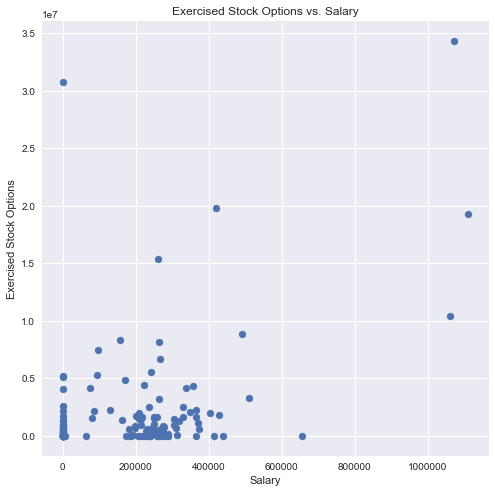

In [16]:
# TODO: create a scatter plot with 'Salary' on x-axis and 'Exercised Stock Option' on y-axis
fig = plt.figure(figsize=(8, 8))
plt.scatter(enron_df['salary'], enron_df['exercised_stock_options'])
plt.title('Exercised Stock Options vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Exercised Stock Options')

### Quiz 2: Deploying Clustering 

**Run** the cell below, which will perform k-means clustering on the data using only the `salary` and `exercised_stock_options` features. Look at the resulting clusters -- because we're only using two features, we can also plot the decision boundary.

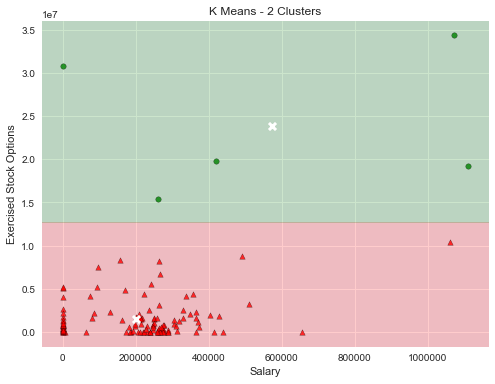

In [26]:
DrawClusters(n_clusters = 2,\
             feature_list = ["salary","exercised_stock_options"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = False,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

### Quiz 3: Clustering with 3 Features

**Run** the cell below to add a third feature to features_list, `total_payments`. The clustering is now performed using 3 input features instead of 2 (obviously we can still only visualize the original 2 features, `salary` and `exercised_stock_options`). We also can't visualize the decision boundary anymore, because the points all have different values for the `total_payments` feature. Compare the clusterings to those you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye -- it was the k-means algorithm that identified it.

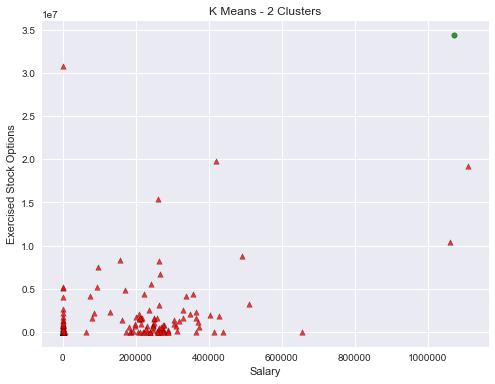

In [17]:
DrawClusters(n_clusters = 2,\
             feature_list = ["salary","exercised_stock_options","total_payments"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = False,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

### Quiz 4: Stock Option Range

We're going to cover [feature scaling](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html), a type of preprocessing that you should perform before some classification and regression tasks. Here’s a general outline of what feature scaling does.

What are the **maximum** and **minimum** values taken by the `exercised_stock_options` feature used in this example? 

In one of the preprocessing steps, all `NaN` entries in `enron_df` were changed to zeroes. We do this because all features passed into `sklearn` classifiers must be numeric. So, to answer this question, you may want to look at the original data *before* this preprocessing step was performed. To help with this task, **create** the data frame `df` from the `enron_data` dictionary without imputating the missing value.

In [10]:
# TODO: create a dataframe from Enron data dictionary without imputing the missing value

df = pd.DataFrame.from_dict(enron_data)
# Take the transpose of the DataFrame so that rows of correspond to individuals
df = df.T
df[df == 'NaN'] = np.nan

print ('DataFrame df has been created!')

DataFrame df has been created!


In [11]:
# TODO: find out the maximum and minimum values taken by the exercised_stock_options

print 'maximum values taken by exercised_stock_options {}'.format(df['exercised_stock_options'].max())
print 'minimum values taken by exercised_stock_options {}'.format(df['exercised_stock_options'].min())

maximum values taken by exercised_stock_options 34348384
minimum values taken by exercised_stock_options 3285


### Quiz 5: Salary Range

What are the **maximum** and **minimum** values taken by the `salary` feature used in this example? 

In [12]:
# TODO: find out the maximum and minimum values taken by the salary

print 'maximum values taken by salary {}'.format(df['salary'].max())
print 'minimum values taken by salary {}'.format(df['salary'].min())

maximum values taken by salary 1111258
minimum values taken by salary 477


### Quiz 6: Clustering Changes

**Run** the cell below to plot the original two clusters, with the features `salary` and `exercised_stock_options`. Note that the features are not yet scaled.

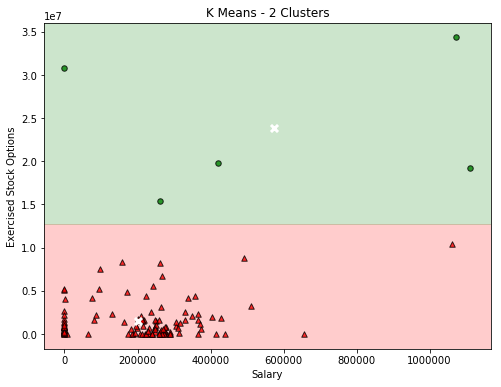

In [13]:
DrawClusters(n_clusters = 2,\
             feature_list = ['salary', 'exercised_stock_options'],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = False,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

Now **run** the cell below to do simple feature rescaling, mapping the original ranges of `exercised_stock_options` and `salary` onto the interval [0, 1]. You should find that some of the points change clusters! You should also find that these clusters are not as stable as in the previous examples. **Run** the cell multiple times. You should find that the reported clusters are sometimes different, depending on where the centroids were initialized for k-means.

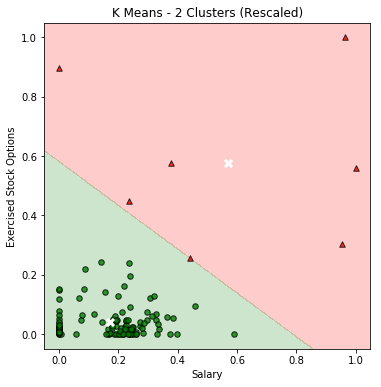

In [14]:
DrawClusters(n_clusters = 2,\
             feature_list = ['salary', 'exercised_stock_options'],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

### Quiz 7: Further Exploration

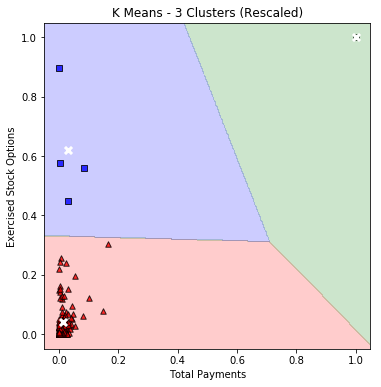

In [15]:
# Example of k-means clustering with 3 clusters, different features, rescaled
DrawClusters(n_clusters = 3,\
             feature_list = ['total_payments', 'exercised_stock_options'],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Total Payments',\
             y_label = 'Exercised Stock Options')

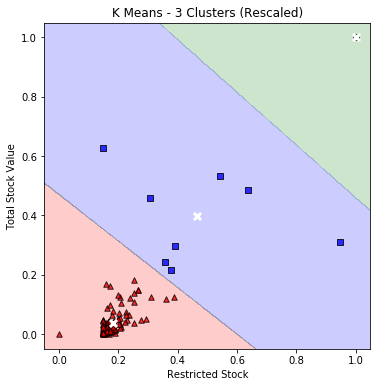

In [16]:
# Example of k-means clustering with 3 clusters, different features, rescaled
DrawClusters(n_clusters = 3,\
             feature_list = ['restricted_stock', 'total_stock_value'],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Restricted Stock',\
             y_label = 'Total Stock Value')

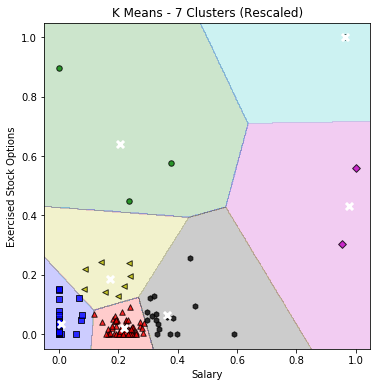

In [17]:
# Example of k-means clustering with 7 clusters, rescaled

DrawClusters(n_clusters = 7,\
             feature_list = ['salary', 'exercised_stock_options'],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')